In [ ]:
# %pip install tensorflow-addons
# %pip uninstall tensorflow-addons
# %pip install tqdm scikit-learn
# %pip install fastparquet pyarrow
# %pip install tensorflow-addons seaborn fastparquet

  Using cached cramjam-2.9.0-cp39-cp39-macosx_11_0_arm64.whl.metadata (4.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.7/684.7 kB 7.1 MB/s eta 0:00:00
Using cached cramjam-2.9.0-cp39-cp39-macosx_11_0_arm64.whl (1.9 MB)
Note: you may need to restart the kernel to use updated packages.
  Using cached tensorflow_addons-0.23.0-cp39-cp39-macosx_11_0_arm64.whl.metadata (1.8 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached typeguard-2.13.3-py3-none-any.whl.metadata (3.6 kB)
Using cached tensorflow_addons-0.23.0-cp39-cp39-macosx_11_0_arm64.whl (12.6 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached typeguard-2.13.3-py3-none-any.whl (17 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
# import tensorflow_addons as tfa
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sn

from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split, GroupShuffleSplit 

import glob
import sys
import os
import math
import gc
import sys
import sklearn
import scipy
import ast
import pyarrow
# import fastparquet

# print(f'Tensorflow V{tf.__version__}')
# print(f'Keras V{tf.keras.__version__}')
# print(f'Python V{sys.version}')

/Users/theerat/Documents/sign-language-translator/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# LSTM

In [2]:
from sklearn.model_selection import train_test_split
from keras import utils

In [3]:
words = os.listdir('/Users/theerat/Dataset/train')

In [4]:
words.remove('.DS_Store')
# words.remove('ไม่มี')

In [10]:
all_words = [
    'ฉัน','กิน','พูด','อยู่','หนังสือ','คุณ','ดื่ม','ฟัง','อะไร',
    'โรงเรียน','เขา','นอน','หัวเราะ','บ้าน','ข้าว','นักเรียน',
    'เดิน','ชอบ','ที่ไหน','วันนี้','ไก่ผัดกะเพรา','วิ่ง','ไม่มี','ปลา','ควาย'
             ]

In [5]:
words

['หนังสือ',
 'อยู่',
 'พูด',
 'อะไร',
 'ไก่ผัดกะเพรา',
 'ปลา',
 'ชอบ',
 'หัวเราะ',
 'ควาย',
 'ไม่มี',
 'ฟัง',
 'ดื่ม',
 'คุณ',
 'นอน',
 'เขา',
 'กิน',
 'โรงเรียน',
 'ฉัน',
 'ที่ไหน',
 'ข้าว',
 'บ้าน',
 'นักเรียน',
 'วันนี้',
 'วิ่ง',
 'เดิน']

In [6]:
len(words)

25

In [8]:
words_np = np.array(words)

In [10]:
DATA_PATH = os.path.join('/Users/theerat/Dataset/train')

In [11]:
label_map = {label:num for num, label in enumerate(words_np)}
label_map

{'หนังสือ': 0,
 'อยู่': 1,
 'พูด': 2,
 'อะไร': 3,
 'ไก่ผัดกะเพรา': 4,
 'ปลา': 5,
 'ชอบ': 6,
 'หัวเราะ': 7,
 'ควาย': 8,
 'ไม่มี': 9,
 'ฟัง': 10,
 'ดื่ม': 11,
 'คุณ': 12,
 'นอน': 13,
 'เขา': 14,
 'กิน': 15,
 'โรงเรียน': 16,
 'ฉัน': 17,
 'ที่ไหน': 18,
 'ข้าว': 19,
 'บ้าน': 20,
 'นักเรียน': 21,
 'วันนี้': 22,
 'วิ่ง': 23,
 'เดิน': 24}

In [12]:
words = label_map.keys()

In [13]:
words

dict_keys(['หนังสือ', 'อยู่', 'พูด', 'อะไร', 'ไก่ผัดกะเพรา', 'ปลา', 'ชอบ', 'หัวเราะ', 'ควาย', 'ไม่มี', 'ฟัง', 'ดื่ม', 'คุณ', 'นอน', 'เขา', 'กิน', 'โรงเรียน', 'ฉัน', 'ที่ไหน', 'ข้าว', 'บ้าน', 'นักเรียน', 'วันนี้', 'วิ่ง', 'เดิน'])

อัดไฟล์

In [67]:
filtered_words = np.array(list(filter(lambda word: word != '.DS_Store', label_map)))
filtered_words

array(['หนังสือ', 'อยู่', 'พูด', 'อะไร', 'ไก่ผัดกะเพรา', 'ปลา', 'ชอบ',
       'หัวเราะ', 'ควาย', 'ไม่มี', 'ฟัง', 'ดื่ม', 'คุณ', 'นอน', 'เขา',
       'กิน', 'โรงเรียน', 'ฉัน', 'ที่ไหน', 'ข้าว', 'บ้าน', 'นักเรียน',
       'วันนี้', 'วิ่ง', 'เดิน'], dtype='<U12')

In [ ]:
#use with npy file 
sequences, labels = [], []
for action in words_np:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [19]:
#test
csv_path ='/Users/theerat/Dataset/test/ควาย/30/27.csv'
df = pd.read_csv(csv_path,skiprows=1)
frame_data = df.to_numpy()

frame_length = frame_data.size

print(f"Frame shape: {frame_data.shape}")
print(f"Frame length (number of features): {frame_length}")
df

Frame shape: (3, 468)
Frame length (number of features): 1404


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 458,Unnamed: 459,Unnamed: 460,Unnamed: 461,Unnamed: 462,Unnamed: 463,Unnamed: 464,Unnamed: 465,Unnamed: 466,Unnamed: 467
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[0.5088492631912231, 0.4371003806591034, -0.40...","[0.5181189775466919, 0.408042311668396, -0.380...","[0.5242165923118591, 0.40814876556396484, -0.3...","[0.5295575857162476, 0.40844979882240295, -0.3...","[0.49535030126571655, 0.40996840596199036, -0....","[0.4867516756057739, 0.41208237409591675, -0.3...","[0.478809654712677, 0.4142126441001892, -0.389...","[0.5369741320610046, 0.42589879035949707, -0.1...","[0.46590837836265564, 0.4387238025665283, -0.2...","[0.5230993628501892, 0.47184911370277405, -0.3...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[0.507597804069519, 0.48158273100852966, -0.01...","[0.5077126026153564, 0.4567560851573944, -0.02...","[0.5072615742683411, 0.46442711353302, -0.0107...","[0.5031067728996277, 0.4331226050853729, -0.01...","[0.5075286030769348, 0.44917523860931396, -0.0...","[0.5069674253463745, 0.4394323229789734, -0.01...","[0.5052244067192078, 0.4161573052406311, -0.00...","[0.4769849479198456, 0.4188508689403534, 0.003...","[0.5042412877082825, 0.3982102870941162, -0.00...","[0.5038819313049316, 0.3881484270095825, -0.00...",...,"[0.5109818577766418, 0.45872125029563904, -0.0...","[0.5129014253616333, 0.4561624526977539, -0.01...","[0.5161660313606262, 0.46057137846946716, -0.0...","[0.5104910731315613, 0.4594475030899048, -0.01...","[0.5099663734436035, 0.46102169156074524, -0.0...","[0.5138695240020752, 0.41394728422164917, 0.00...","[0.511873185634613, 0.41576653718948364, 0.001...","[0.5109558701515198, 0.4169583022594452, -0.00...","[0.5302391052246094, 0.40931257605552673, 0.00...","[0.5319879055023193, 0.40594637393951416, 0.00..."


In [20]:
words = label_map.keys()

In [24]:
import os
import pandas as pd
import numpy as np
import ast
from tqdm import tqdm

sequences_train, labels_train = [], []

sequence_length = 30
frame_length = 1662

# label_map = {
#     'หนังสือ': 0, 'อยู่': 1, 'พูด': 2, 'ไก่ผัดกะเพรา': 3, 'ชอบ': 4,
#     'หัวเราะ': 5, 'ควาย': 6, 'ฟัง': 7, 'ดื่ม': 8, 'คุณ': 9, 'นอน': 10, 
#     'เขา': 11, 'กิน': 12, 'โรงเรียน': 13, 'ฉัน': 14, 'นักเรียน': 15, 
#     'วิ่ง': 16, 'เดิน': 17
# }

# words = label_map.keys()
# DATA_PATH = "path_to_your_data"

for action in tqdm(words, desc="Processing Actions"):
    n_sequences = os.listdir(os.path.join(DATA_PATH, action))
    n_sequences = list(filter(lambda seq: seq != '.DS_Store', n_sequences))
    
    for sequence in tqdm(n_sequences, desc=f"Sequences for {action}", leave=False):
        window = []
        print(action)
        for frame_num in range(sequence_length):
            csv_path = os.path.join(DATA_PATH, action, sequence, f'{frame_num}.csv')
            res = pd.read_csv(csv_path, skiprows=1).to_numpy()
    
            res_cleaned = []
            for row in res:
                for val in row:
                    if isinstance(val, str):
                        res_cleaned.extend(ast.literal_eval(val))
                    elif not np.isnan(val):
                        res_cleaned.append(val)
            
            res_cleaned = np.nan_to_num(res_cleaned, nan=0.0)
            
            if len(res_cleaned) < frame_length:
                res_cleaned = np.pad(res_cleaned, (0, frame_length - len(res_cleaned)), mode='constant', constant_values=0)
            elif len(res_cleaned) > frame_length:
                res_cleaned = res_cleaned[:frame_length]
            
            window.append(res_cleaned)
        
        if len(window) < sequence_length:
            padding_frame = np.zeros((frame_length,))
            for _ in range(sequence_length - len(window)):
                window.append(padding_frame)
        elif len(window) > sequence_length:
            window = window[:sequence_length]
        
        sequences_train.append(window)
        labels_train.append(label_map[action])

X_train = np.array(sequences_train)
y_train = utils.to_categorical(labels_train).astype(int)

print(f"Shape of X: {X_train.shape}")
print(f"Shape of y: {y_train.shape}")


Processing Actions:   0%|          | 0/25 [00:00<?, ?it/s]

หนังสือ


หนังสือ


หนังสือ


หนังสือ


หนังสือ


หนังสือ


หนังสือ


หนังสือ


หนังสือ


หนังสือ


หนังสือ


หนังสือ


หนังสือ


หนังสือ


หนังสือ


หนังสือ


หนังสือ


หนังสือ


หนังสือ


หนังสือ


Processing Actions:   4%|▍         | 1/25 [00:11<04:31, 11.30s/it]

อยู่


อยู่


อยู่


อยู่


อยู่


อยู่


อยู่


อยู่


อยู่


อยู่


อยู่


อยู่


อยู่


อยู่


อยู่


อยู่


อยู่


อยู่


อยู่


อยู่


Processing Actions:   8%|▊         | 2/25 [00:22<04:19, 11.26s/it]

พูด


พูด


พูด


พูด


พูด


พูด


พูด


พูด


พูด


พูด


พูด


พูด


พูด


พูด


พูด


พูด


พูด


พูด


พูด


พูด


Processing Actions:  12%|█▏        | 3/25 [00:33<04:06, 11.22s/it]

อะไร


อะไร


อะไร


อะไร


อะไร


อะไร


อะไร


อะไร


อะไร


อะไร


อะไร


อะไร


อะไร


อะไร


อะไร


อะไร


อะไร


อะไร


อะไร


อะไร


Processing Actions:  16%|█▌        | 4/25 [00:45<03:56, 11.25s/it]

ไก่ผัดกะเพรา


ไก่ผัดกะเพรา


ไก่ผัดกะเพรา


ไก่ผัดกะเพรา


ไก่ผัดกะเพรา


ไก่ผัดกะเพรา


ไก่ผัดกะเพรา


ไก่ผัดกะเพรา


ไก่ผัดกะเพรา


ไก่ผัดกะเพรา


ไก่ผัดกะเพรา


ไก่ผัดกะเพรา


ไก่ผัดกะเพรา


ไก่ผัดกะเพรา


ไก่ผัดกะเพรา


ไก่ผัดกะเพรา


ไก่ผัดกะเพรา


ไก่ผัดกะเพรา


ไก่ผัดกะเพรา


ไก่ผัดกะเพรา


Processing Actions:  20%|██        | 5/25 [00:56<03:45, 11.27s/it]

ปลา


ปลา


ปลา


ปลา


ปลา


ปลา


ปลา


ปลา


ปลา


ปลา


ปลา


ปลา


ปลา


ปลา


ปลา


ปลา


ปลา


ปลา


ปลา


ปลา


Processing Actions:  24%|██▍       | 6/25 [01:07<03:33, 11.25s/it]

ชอบ


ชอบ


ชอบ


ชอบ


ชอบ


ชอบ


ชอบ


ชอบ


ชอบ


ชอบ


ชอบ


ชอบ


ชอบ


ชอบ


ชอบ


ชอบ


ชอบ


ชอบ


ชอบ


ชอบ


Processing Actions:  28%|██▊       | 7/25 [01:18<03:22, 11.25s/it]

หัวเราะ


หัวเราะ


หัวเราะ


หัวเราะ


หัวเราะ


หัวเราะ


หัวเราะ


หัวเราะ


หัวเราะ


หัวเราะ


หัวเราะ


หัวเราะ


หัวเราะ


หัวเราะ


หัวเราะ


หัวเราะ


หัวเราะ


หัวเราะ


หัวเราะ


หัวเราะ


Processing Actions:  32%|███▏      | 8/25 [01:30<03:11, 11.25s/it]

ควาย


ควาย


ควาย


ควาย


ควาย


ควาย


ควาย


ควาย


ควาย


ควาย


ควาย


ควาย


ควาย


ควาย


ควาย


ควาย


ควาย


ควาย


ควาย


ควาย


Processing Actions:  36%|███▌      | 9/25 [01:41<02:59, 11.24s/it]

ไม่มี


ไม่มี


ไม่มี


ไม่มี


ไม่มี


ไม่มี


ไม่มี


ไม่มี


ไม่มี


ไม่มี


ไม่มี


ไม่มี


ไม่มี


ไม่มี


ไม่มี


ไม่มี


ไม่มี


ไม่มี


ไม่มี


ไม่มี


Processing Actions:  40%|████      | 10/25 [01:52<02:48, 11.24s/it]

ฟัง


ฟัง


ฟัง


ฟัง


ฟัง


ฟัง


ฟัง


ฟัง


ฟัง


ฟัง


ฟัง


ฟัง


ฟัง


ฟัง


ฟัง


ฟัง


ฟัง


ฟัง


ฟัง


ฟัง


Processing Actions:  44%|████▍     | 11/25 [02:03<02:37, 11.23s/it]

ดื่ม


ดื่ม


ดื่ม


ดื่ม


ดื่ม


ดื่ม


ดื่ม


ดื่ม


ดื่ม


ดื่ม


ดื่ม


ดื่ม


ดื่ม


ดื่ม


ดื่ม


ดื่ม


ดื่ม


ดื่ม


ดื่ม


ดื่ม


Processing Actions:  48%|████▊     | 12/25 [02:14<02:25, 11.22s/it]

คุณ


คุณ


คุณ


คุณ


คุณ


คุณ


คุณ


คุณ


คุณ


คุณ


คุณ


คุณ


คุณ


คุณ


คุณ


คุณ


คุณ


คุณ


คุณ


คุณ


Processing Actions:  52%|█████▏    | 13/25 [02:26<02:14, 11.22s/it]

นอน


นอน


นอน


นอน


นอน


นอน


นอน


นอน


นอน


นอน


นอน


นอน


นอน


นอน


นอน


นอน


นอน


นอน


นอน


นอน


Processing Actions:  56%|█████▌    | 14/25 [02:37<02:03, 11.25s/it]

เขา


เขา


เขา


เขา


เขา


เขา


เขา


เขา


เขา


เขา


เขา


เขา


เขา


เขา


เขา


เขา


เขา


เขา


เขา


เขา


Processing Actions:  60%|██████    | 15/25 [02:48<01:53, 11.30s/it]

กิน


กิน


กิน


กิน


กิน


กิน


กิน


กิน


กิน


กิน


กิน


กิน


กิน


กิน


กิน


กิน


กิน


กิน


กิน


กิน


Processing Actions:  64%|██████▍   | 16/25 [03:00<01:41, 11.27s/it]

โรงเรียน


โรงเรียน


โรงเรียน


โรงเรียน


โรงเรียน


โรงเรียน


โรงเรียน


โรงเรียน


โรงเรียน


โรงเรียน


โรงเรียน


โรงเรียน


โรงเรียน


โรงเรียน


โรงเรียน


โรงเรียน


โรงเรียน


โรงเรียน


โรงเรียน


โรงเรียน


Processing Actions:  68%|██████▊   | 17/25 [03:11<01:30, 11.33s/it]

ฉัน


ฉัน


ฉัน


ฉัน


ฉัน


ฉัน


ฉัน


ฉัน


ฉัน


ฉัน


ฉัน


ฉัน


ฉัน


ฉัน


ฉัน


ฉัน


ฉัน


ฉัน


ฉัน


ฉัน


Processing Actions:  72%|███████▏  | 18/25 [03:22<01:18, 11.27s/it]

ที่ไหน


ที่ไหน


ที่ไหน


ที่ไหน


ที่ไหน


ที่ไหน


ที่ไหน


ที่ไหน


ที่ไหน


ที่ไหน


ที่ไหน


ที่ไหน


ที่ไหน


ที่ไหน


ที่ไหน


ที่ไหน


ที่ไหน


ที่ไหน


ที่ไหน


ที่ไหน


Processing Actions:  76%|███████▌  | 19/25 [03:34<01:08, 11.34s/it]

ข้าว


ข้าว


ข้าว


ข้าว


ข้าว


ข้าว


ข้าว


ข้าว


ข้าว


ข้าว


ข้าว


ข้าว


ข้าว


ข้าว


ข้าว


ข้าว


ข้าว


ข้าว


ข้าว


ข้าว


Processing Actions:  80%|████████  | 20/25 [03:45<00:56, 11.24s/it]

บ้าน


บ้าน


บ้าน


บ้าน


บ้าน


บ้าน


บ้าน


บ้าน


บ้าน


บ้าน


บ้าน


บ้าน


บ้าน


บ้าน


บ้าน


บ้าน


บ้าน


บ้าน


บ้าน


บ้าน


Processing Actions:  84%|████████▍ | 21/25 [03:56<00:44, 11.21s/it]

นักเรียน


นักเรียน


นักเรียน


นักเรียน


นักเรียน


นักเรียน


นักเรียน


นักเรียน


นักเรียน


นักเรียน


นักเรียน


นักเรียน


นักเรียน


นักเรียน


นักเรียน


นักเรียน


นักเรียน


นักเรียน


นักเรียน


นักเรียน


Processing Actions:  88%|████████▊ | 22/25 [04:07<00:33, 11.16s/it]

วันนี้


วันนี้


วันนี้


วันนี้


วันนี้


วันนี้


วันนี้


วันนี้


วันนี้


วันนี้


วันนี้


วันนี้


วันนี้


วันนี้


วันนี้


วันนี้


วันนี้


วันนี้


วันนี้


วันนี้


Processing Actions:  92%|█████████▏| 23/25 [04:18<00:22, 11.13s/it]

วิ่ง


วิ่ง


วิ่ง


วิ่ง


วิ่ง


วิ่ง


วิ่ง


วิ่ง


วิ่ง


วิ่ง


วิ่ง


วิ่ง


วิ่ง


วิ่ง


วิ่ง


วิ่ง


วิ่ง


วิ่ง


วิ่ง


วิ่ง


Processing Actions:  96%|█████████▌| 24/25 [04:30<00:11, 11.33s/it]

เดิน


เดิน


เดิน


เดิน


เดิน


เดิน


เดิน


เดิน


เดิน


เดิน


เดิน


เดิน


เดิน


เดิน


เดิน


เดิน


เดิน


เดิน


เดิน


เดิน


Processing Actions: 100%|██████████| 25/25 [04:41<00:00, 11.25s/it]

Shape of X: (500, 30, 1662)
Shape of y: (500, 25)


In [21]:
X_train.shape, y_train.shape

((500, 30, 1662), (500, 25))

In [22]:
import os
import pandas as pd
import numpy as np
import ast
from tqdm import tqdm

sequences_test, labels_test  = [], []

sequence_length = 30
frame_length = 1662

DATA_PATH_TEST = os.path.join('/Users/theerat/Dataset/test')

# label_map = {
#     'หนังสือ': 0, 'อยู่': 1, 'พูด': 2, 'ไก่ผัดกะเพรา': 3, 'ชอบ': 4,
#     'หัวเราะ': 5, 'ควาย': 6, 'ฟัง': 7, 'ดื่ม': 8, 'คุณ': 9, 'นอน': 10, 
#     'เขา': 11, 'กิน': 12, 'โรงเรียน': 13, 'ฉัน': 14, 'นักเรียน': 15, 
#     'วิ่ง': 16, 'เดิน': 17
# }

# words = label_map.keys()
# DATA_PATH = "path_to_your_data"

for action in tqdm(words, desc="Processing Actions"):
    n_sequences = os.listdir(os.path.join(DATA_PATH_TEST, action))
    n_sequences = list(filter(lambda seq: seq != '.DS_Store', n_sequences))
    
    for sequence in tqdm(n_sequences, desc=f"Sequences for {action}", leave=False):
        window = []
        print(action)
        for frame_num in range(sequence_length):
            csv_path = os.path.join(DATA_PATH_TEST, action, sequence, f'{frame_num}.csv')
            res = pd.read_csv(csv_path, skiprows=1).to_numpy()
    
            res_cleaned = []
            for row in res:
                for val in row:
                    if isinstance(val, str):
                        res_cleaned.extend(ast.literal_eval(val))
                    elif not np.isnan(val):
                        res_cleaned.append(val)
            
            res_cleaned = np.nan_to_num(res_cleaned, nan=0.0)
            
            if len(res_cleaned) < frame_length:
                res_cleaned = np.pad(res_cleaned, (0, frame_length - len(res_cleaned)), mode='constant', constant_values=0)
            elif len(res_cleaned) > frame_length:
                res_cleaned = res_cleaned[:frame_length]
            
            window.append(res_cleaned)
        
        if len(window) < sequence_length:
            padding_frame = np.zeros((frame_length,))
            for _ in range(sequence_length - len(window)):
                window.append(padding_frame)
        elif len(window) > sequence_length:
            window = window[:sequence_length]
        
        sequences_test.append(window)
        labels_test.append(label_map[action])

X_test = np.array(sequences_test)
y_test = utils.to_categorical(labels_test).astype(int)
print(f"Shape of X: {X_test.shape}")
print(f"Shape of y: {y_test.shape}")

Processing Actions: 100%|██████████| 25/25 [02:16<00:00,  5.46s/it]

Shape of X: (250, 30, 1662)
Shape of y: (250, 25)


In [23]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (500, 30, 1662)
Shape of y_train: (500, 25)
Shape of X_test: (250, 30, 1662)
Shape of y_test: (250, 25)


In [25]:
np.save('s_train_fix.npy', X_train)
np.save('l_train_fix.npy', y_train)
np.save('s_test_fix.npy', X_test)
np.save('l_test_fix.npy', y_test)

In [26]:
sequences2, labels2 = np.load('s_train_fix.npy'), np.load('l_train_fix.npy')

In [27]:
df = pd.DataFrame({'sequence':sequences2, 'label':labels2})
df

ValueError: Per-column arrays must each be 1-dimensional

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape    

((500, 30, 1662), (250, 30, 1662), (500, 25), (250, 25))

In [29]:
y_train_sparse = np.argmax(y_train, axis=-1)
y_train_sparse

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11,
       11, 11, 11, 11, 11

__New Model__

In [30]:
from keras import models, layers, callbacks
from keras import callbacks, Model, Input

In [64]:
# include early stopping and reducelr
def get_callbacks():
    return [
        callbacks.EarlyStopping(
            monitor="val_accuracy", patience=10, restore_best_weights=True
        ),
        callbacks.ReduceLROnPlateau(
            monitor="val_accuracy", factor=0.5, patience=3
        ),
    ]


# a single dense block followed by a normalization block and relu activation
def dense_block(units, name):
    fc = layers.Dense(units)
    norm = layers.LayerNormalization()
    act = layers.Activation("relu")
    drop = layers.Dropout(0.1)
    return lambda x: drop(act(norm(fc(x))))


# the lstm block with the final dense block for the classification
def classifier(lstm_units):
    lstm = layers.LSTM(lstm_units)
    out = layers.Dense(25, activation="softmax")
    return lambda x: out(lstm(x))

In [65]:
import tensorflow as tf
from keras import layers, Model, Input, callbacks,optimizers

encoder_units = [512, 256]
lstm_units = 500  

inputs = Input(shape=(30, 1662))

x = inputs
for i, n in enumerate(encoder_units):
    x = dense_block(n, f"encoder_{i}")(x)

out = classifier(lstm_units)(x)

model = Model(inputs=inputs, outputs=out)
model.compile(optimizer=optimizers.Adam(), loss="categorical_crossentropy", metrics=["accuracy"])
callbacks_list = get_callbacks()
model.summary()

Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_24 (InputLayer)     │ (None, 30, 1662)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 30, 512)        │       851,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_18          │ (None, 30, 512)        │         1,024 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_22 (Activation)      │ (None, 30, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 30, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 30, 256)        │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_19          │ (None, 30, 256)        │           512 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_23 (Activation)      │ (None, 30, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 30, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 500)            │     1,514,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 25)             │        12,525 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,510,845 (9.58 MB)

 Trainable params: 2,510,845 (9.58 MB)

 Non-trainable params: 0 (0.00 B)

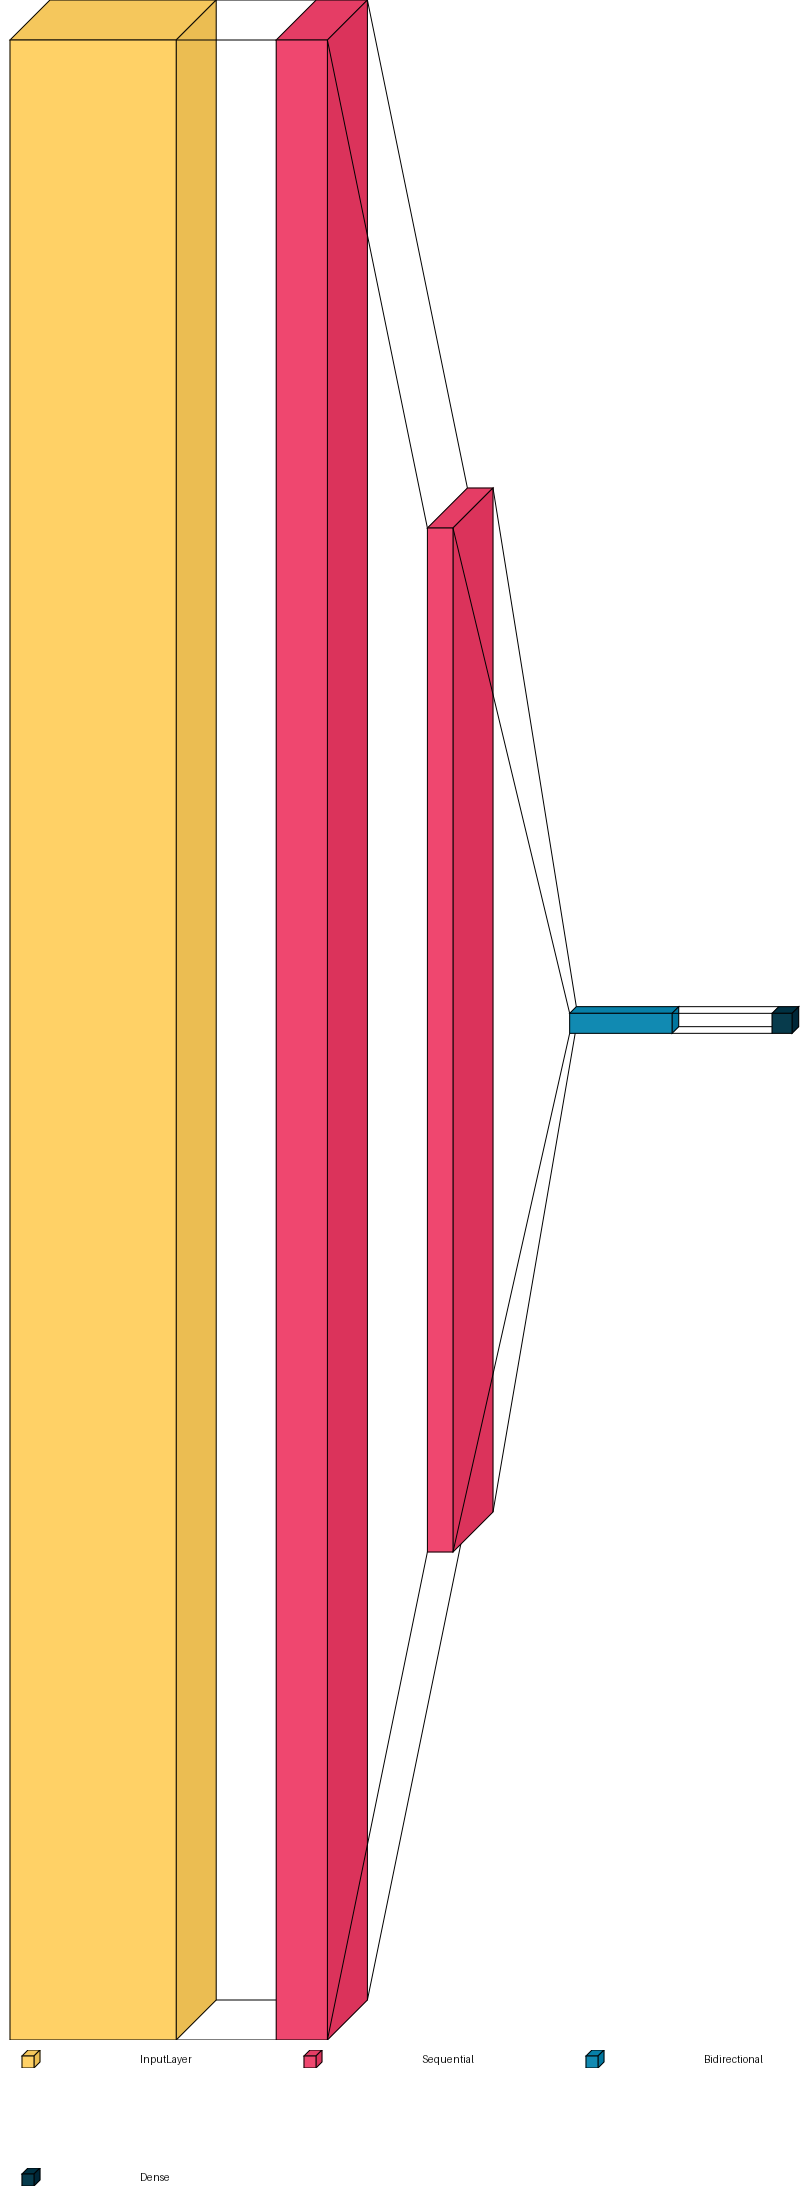

In [46]:
import visualkeras
from PIL import ImageFont
# font = ImageFont.truetype("SukhumvitSet-Medium.ttf", 9)
visualkeras.layered_view(model, legend=True,spacing=100)

In [66]:
history = model.fit(
                    X_train,
                    y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    # callbacks=callbacks_list,
                    verbose=1
                    )

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 150ms/step - accuracy: 0.0451 - loss: 3.2618 - val_accuracy: 0.0000e+00 - val_loss: 5.9098
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.0780 - loss: 2.9332 - val_accuracy: 0.0000e+00 - val_loss: 6.7246
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.2024 - loss: 2.3876 - val_accuracy: 0.0000e+00 - val_loss: 8.0192
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 176ms/step - accuracy: 0.3129 - loss: 1.9220 - val_accuracy: 0.0000e+00 - val_loss: 8.8184
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 245ms/step - accuracy: 0.3123 - loss: 1.6649 - val_accuracy: 0.0000e+00 - val_loss: 8.6611
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 246ms/step - accuracy: 0.4305 - loss: 1.3801 - val_accuracy: 0.0000e+00 - val_loss: 8.8311
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 281ms/step - accuracy: 0.4409 - loss: 1.3744 - val_accuracy: 0.0000e+00 - val_loss: 9.0695
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 245ms/step - accuracy: 0.40

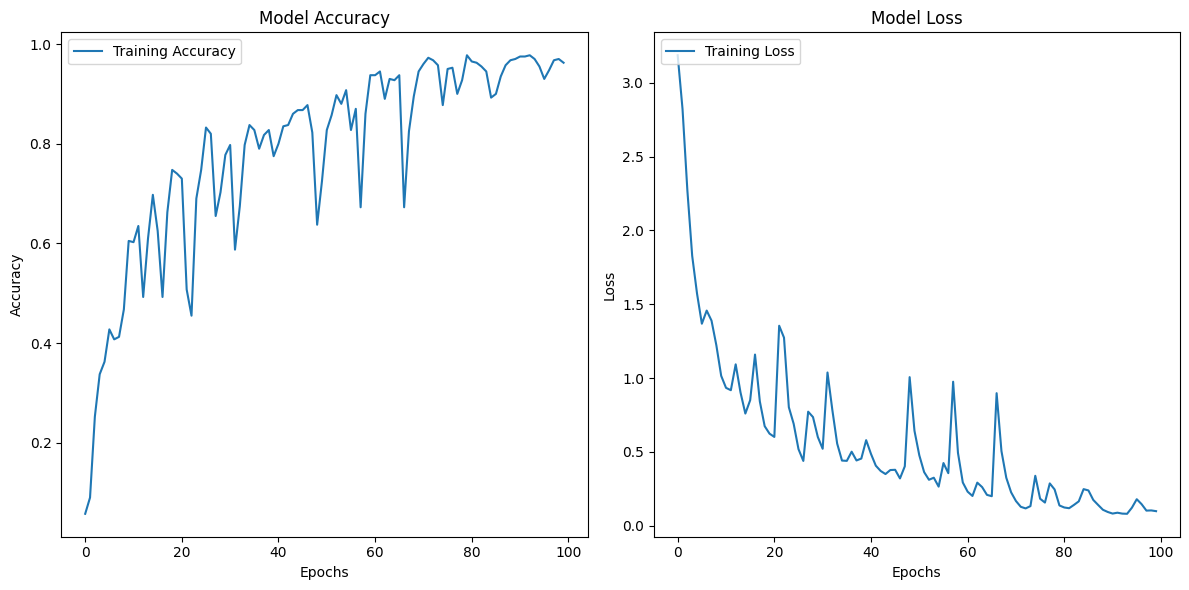

In [68]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper left')

# Show the plots
plt.tight_layout()
plt.show()


In [70]:
# model.save('model_25_2_fix.h5')
model.save_weights('weights_25_2_fix.weights.h5')

In [71]:
labels_predict = model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step


In [72]:
# Decoding
labels_predict = np.argmax(labels_predict , axis=1)
labels_test_normal = np.argmax(y_test , axis=1)

In [73]:
labels_test_normal.shape , labels_predict.shape

((250,), (250,))

In [74]:
labels_predict

array([ 0, 16,  0,  0, 16, 16,  0,  0,  0, 16,  1,  1, 14,  1,  1,  1,  1,
        8,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  5,
        3,  3,  3,  3,  3, 19,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5, 19,  6,  6,  7,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  1,  8,  1,  8,  8,
        8,  8,  8,  8,  8,  9,  7,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13,  7, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 14, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 18,
       18,  0, 18, 18, 18

In [75]:
#Accuracy Score
from sklearn.metrics import accuracy_score
AccScore = accuracy_score(labels_predict, labels_test_normal)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  0.74


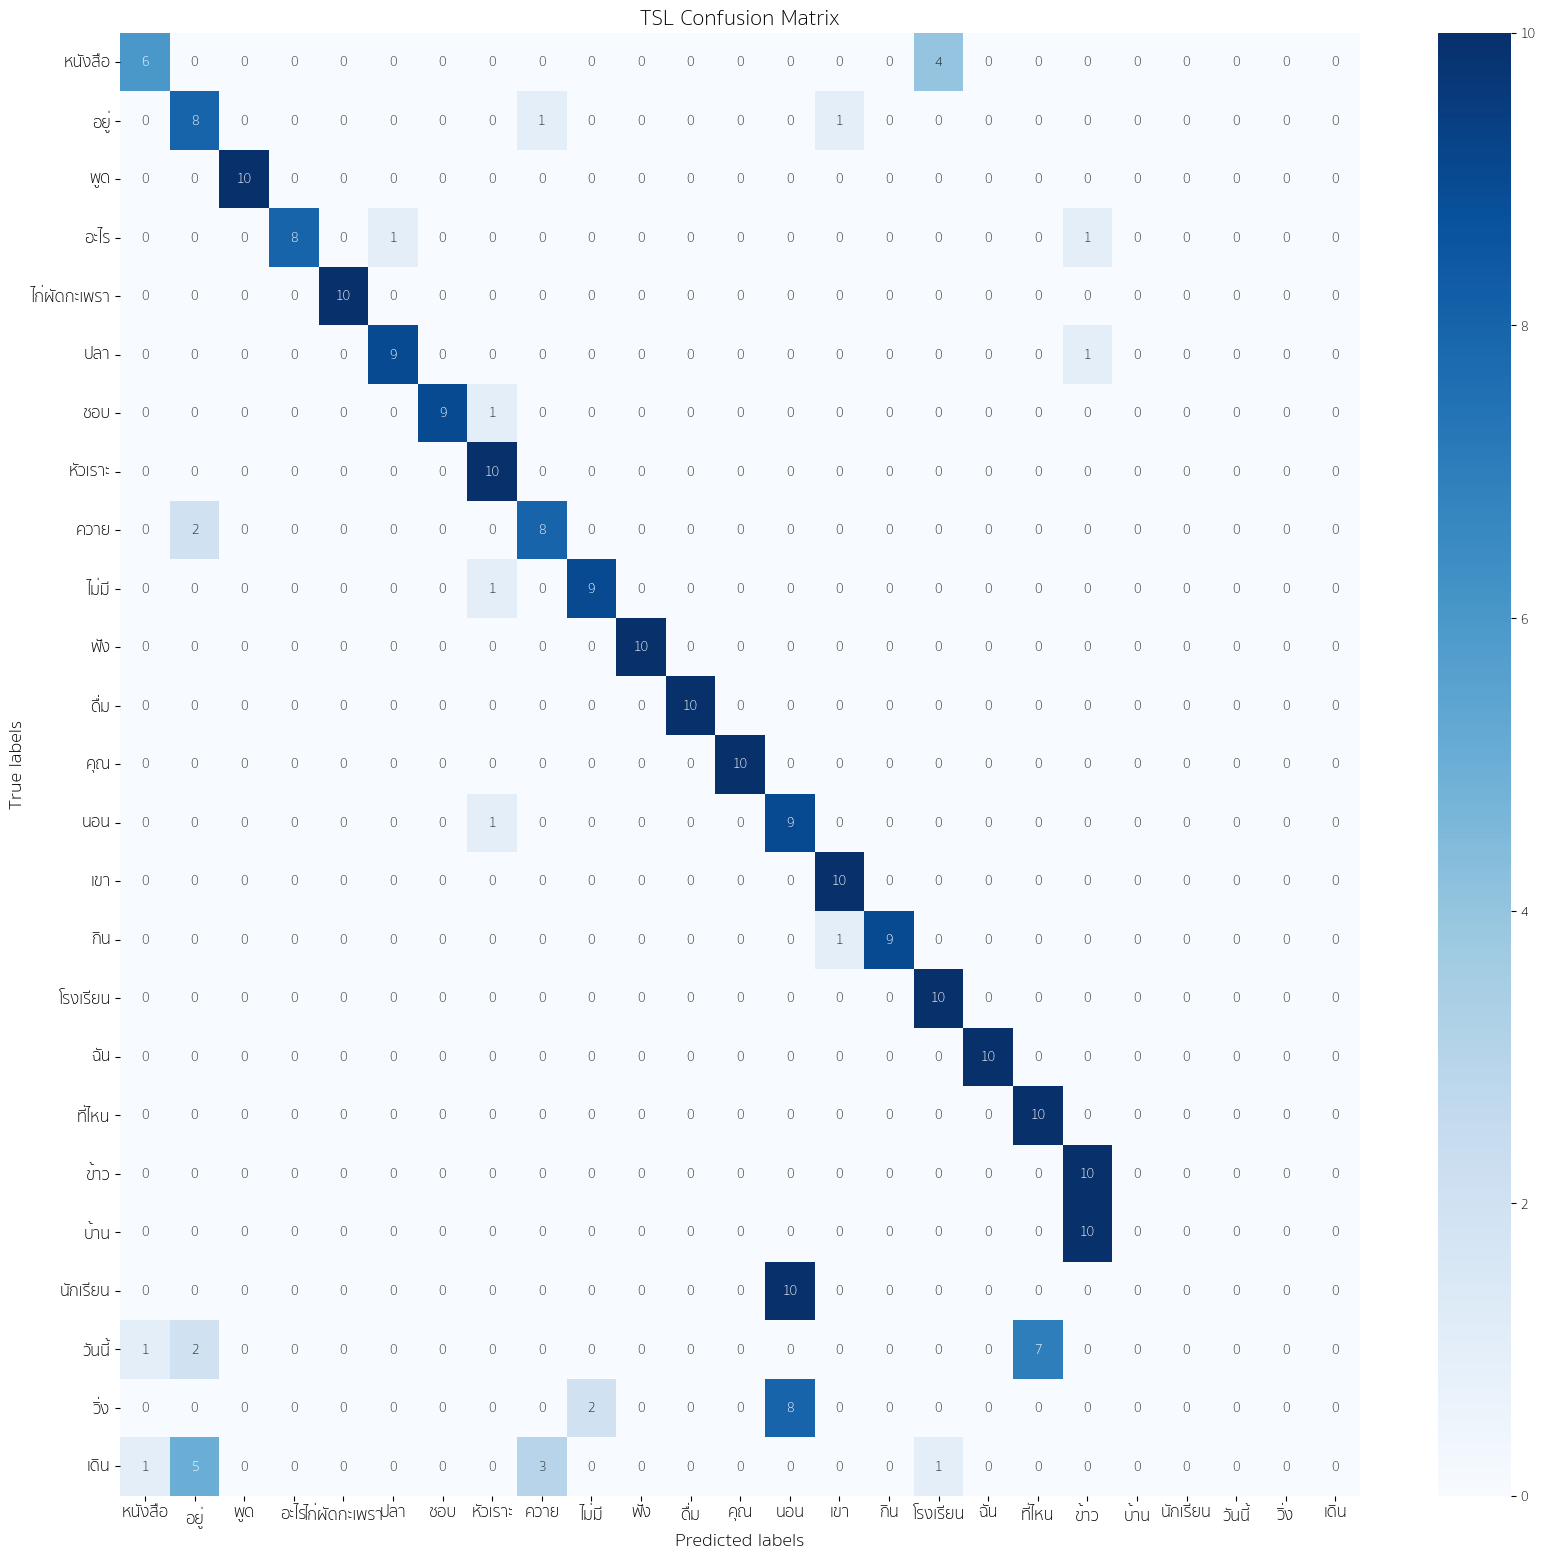

In [77]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc

# ตั้งค่า Thai Font (ตัวอย่างใช้ฟอนต์ TH Sarabun New)
thai_font_path = "/Users/theerat/Documents/sign-language-translator/Datasets/SukhumvitSet-Medium.ttf"  # หรือพาธที่ตรงกับระบบของคุณ
font_prop = matplotlib.font_manager.FontProperties(fname=thai_font_path)
matplotlib.rcParams['font.family'] = font_prop.get_name()

class_labels = words


cm = confusion_matrix(labels_test_normal, labels_predict)

fig, ax = plt.subplots(figsize=(20, 19))
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap="Blues")

ax.set_xlabel('Predicted labels', fontsize=14)
ax.set_ylabel('True labels', fontsize=14)
ax.set_title('TSL Confusion Matrix', fontsize=16)

ax.set_xticklabels(class_labels, rotation=0, fontsize=12)
ax.set_yticklabels(class_labels, rotation=0, fontsize=12)

plt.show()


In [78]:
print(cm)

[[ 6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0
   0]
 [ 0  8  0  0  0  0  0  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  8  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   0]
 [ 0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   0]
 [ 0  0  0  0  0  0  9  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  2  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  1  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 10

In [79]:
from sklearn.metrics import classification_report

ClassificationReport = classification_report(labels_test_normal,labels_predict)
print('Classification Report is : \n', ClassificationReport)

Classification Report is : 
               precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.47      0.80      0.59        10
           2       1.00      1.00      1.00        10
           3       1.00      0.80      0.89        10
           4       1.00      1.00      1.00        10
           5       0.90      0.90      0.90        10
           6       1.00      0.90      0.95        10
           7       0.77      1.00      0.87        10
           8       0.67      0.80      0.73        10
           9       0.82      0.90      0.86        10
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       0.33      0.90      0.49        10
          14       0.83      1.00      0.91        10
          15       1.00      0.90      0.95        10
          16       0.67      1.00      0.80        1

/Users/theerat/Documents/sign-language-translator/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/theerat/Documents/sign-language-translator/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/theerat/Documents/sign-language-translator/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [51]:
label_map

{'หนังสือ': 0,
 'อยู่': 1,
 'พูด': 2,
 'ไก่ผัดกะเพรา': 3,
 'ชอบ': 4,
 'หัวเราะ': 5,
 'ควาย': 6,
 'ฟัง': 7,
 'ดื่ม': 8,
 'คุณ': 9,
 'นอน': 10,
 'เขา': 11,
 'กิน': 12,
 'โรงเรียน': 13,
 'ฉัน': 14,
 'นักเรียน': 15,
 'วิ่ง': 16,
 'เดิน': 17}

In [ ]:
#คำที่มีปัญหา
error_words = ['หัวเราะ','นอน','โรงเรียน','ฉัน']

In [70]:
len(cm)

19

# __Test__

In [235]:
from scipy import stats
import cv2

# __Transformer__

In [3]:
# MatplotLib Global Settings
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['axes.titlesize'] = 24

In [4]:
# If True, processing data from scratch
# If False, loads preprocessed data
PREPROCESS_DATA = False
TRAIN_MODEL = True
# True: use 10% of participants as validation set
# False: use all data for training -> gives better LB result
USE_VAL = False

N_ROWS = 543
N_DIMS = 3
DIM_NAMES = ['x', 'y', 'z']
SEED = 42
NUM_CLASSES = 100
IS_INTERACTIVE = True
VERBOSE = 1 if IS_INTERACTIVE else 2

INPUT_SIZE = 64

BATCH_ALL_SIGNS_N = 4
BATCH_SIZE = 32
N_EPOCHS = 100
LR_MAX = 1e-3
N_WARMUP_EPOCHS = 0
WD_RATIO = 0.05
MASK_VAL = 4237

In [5]:
def print_shape_dtype(l, names):
    for e, n in zip(l, names):
        print(f'{n} shape: {e.shape}, dtype: {e.dtype}')

In [12]:
#for csv file
import os
import pandas as pd

folder_path = '/Users/theerat/Downloads/บ้าน-2'
data = []

for subfolder in os.listdir(folder_path):
    subfolder_path = os.path.join(folder_path, subfolder)
    
    if os.path.isdir(subfolder_path):
        for filename in os.listdir(subfolder_path):
            if filename.endswith('.csv'):
                file_path = os.path.join(subfolder_path, filename)
                sequence_id = int(filename.split('_')[1].split('.')[0])  # ได้ sequence_id จากชื่อไฟล์
                participant_id = 70
                sign = 'บ้าน'

                # เพิ่มข้อมูลลงใน list
                data.append({
                    'path': file_path,
                    'participant_id': participant_id,
                    'sequence_id': sequence_id,
                    'sign': sign
                })

# สร้าง DataFrame จากข้อมูลที่เก็บรวบรวม
df = pd.DataFrame(data)

df = df.sort_values(by='sequence_id')

# บันทึกเป็นไฟล์ CSV
df.to_csv('output.csv', index=False)


In [23]:
import os
import numpy as np
import pandas as pd

folder_path = '/Users/theerat/Downloads/MP_DATA3/คุย'
data = []
participant_id = 0

# อ่านโฟลเดอร์ทั้งหมดภายใน
for subfolder in os.listdir(folder_path):
    subfolder_path = os.path.join(folder_path, subfolder)
    
    if os.path.isdir(subfolder_path):
        # อ่านไฟล์ .npy ภายในแต่ละโฟลเดอร์
        for filename in os.listdir(subfolder_path):
            if filename.endswith('.npy'):
                file_path = os.path.join(subfolder_path, filename)
                sequence_id = int(filename.split('.')[0])  # ได้ sequence_id จากชื่อไฟล์
                sign = 'ก'

                # เพิ่มข้อมูลลงใน list
                data.append({
                    'path': file_path,
                    'participant_id': participant_id,
                    'sequence_id': sequence_id,
                    'sign': sign
                })
                participant_id += 1


# สร้าง DataFrame จากข้อมูลที่เก็บรวบรวม
df = pd.DataFrame(data)

df = df.sort_values(by='sequence_id')
# บันทึกเป็นไฟล์ CSV
df.to_csv('outputnpy.csv', index=False)


In [24]:
pd.read_csv('outputnpy.csv')

,path,participant_id,sequence_id,sign
0,/Users/theerat/Downloads/MP_DATA3/คุย/17/0.npy,76,0,ก
1,/Users/theerat/Downloads/MP_DATA3/คุย/15/0.npy,166,0,ก
2,/Users/theerat/Downloads/MP_DATA3/คุย/3/0.npy,196,0,ก
3,/Users/theerat/Downloads/MP_DATA3/คุย/4/0.npy,136,0,ก
4,/Users/theerat/Downloads/MP_DATA3/คุย/2/0.npy,226,0,ก
...,...,...,...,...
235,/Users/theerat/Downloads/MP_DATA3/คุย/4/29.npy,140,29,ก
236,/Users/theerat/Downloads/MP_DATA3/คุย/29/29.npy,50,29,ก
237,/Users/theerat/Downloads/MP_DATA3/คุย/3/29.npy,200,29,ก
238,/Users/theerat/Downloads/MP_DATA3/คุย/15/29.npy,170,29,ก


In [6]:
word_list = { "สวัสดี": 0,
 "ตก": 1,
 "รอ": 2,
 "กลับ": 3,
 "ขอบคุณ": 4,
 "ตัด": 5,
 "ลง": 6,
 "ขึ้น": 7,
 "เฝ้า": 8,
 "คุย": 9,
 "ช่วย": 10,
 "เชื่อ": 11,
 "ฟัง": 12,
 "มอง": 13,
 "พา": 14,
 "ชวน หลีกภัย": 15,
 "ทักษิณ ชินวัตร": 16,
 "ขนม": 17,
 "พิธา ลิ้มเจริญรัตน์": 18,
 "ศิริกัญญา ตันสกุล": 19,
 "แบก": 20,
 "อนุทิน ชาญวีรกูล": 21,
 "รังสิมันต์ โรม": 22,
 "พีระพันธุ์ สาลีรัฐวิภาค": 23,
 "คุณหญิงสุดารัตน์ เกยุราพันธุ์": 24,
 "พลเอกอนุพงษ์ เผ่าจินดา": 25,
 "สุวัจน์ ลิปตพัลลภ": 26,
 "กรณ์ จาติกวณิช": 27,
 "วราวุธ ศิลปะอาชา": 28,
 "พล.ต.อ.เสรีพิศุทธ์ เตมียเวสวราวุธ ศิลปะอาชา": 29,
 "ศักดิ์สยาม ชิดชอบ": 30,
 "ชาดา ไทยเศรษฐ์": 31,
 "สุชัชวีร์ สุวรรณสวัสดิ์": 32,
 "จุรินทร์ ลักษณวิศิษฏ์": 33,
 "ไตรรงค์ สุวรรณคีรี": 34,
 "พลเอกประยุทธ์ จันทร์โอชา": 35,
 "นฤมล ภิญโญสินวัฒน์": 36,
 "ธรรมนัส พรหมเผ่า": 37,
 "ชัยวุฒิ ธนาคมานุสรณ์": 38,
 "ไพบูลย์ นิติตะวัน": 39,
 "พลเอกประวิตร วงษ์สุวรรณ": 40,
 "พริษฐ์ วัชรสินธุ": 41,
 "ยิ่งลักษณ์ ชินวัตร": 42,
 "ณัฐวุฒิ ใสยเกื้อ": 43,
 "นพ.ชลน่าน ศรีแก้ว": 44,
 "เศรษฐา ทวีสิน": 45,
 "แพทองธาร ชินวัตร": 46,
 "อะไร": 47,
 "สมัคร": 48,
 "กระโดด": 49,
 "ยก": 50,
 "ชน": 51,
 "ผ่าน": 52,
 "แนะนำ": 53,
 "จำได้": 54,
 "ปลูก": 55,
 "รวม": 56,
 "ทำหาย": 57,
 "เจอ": 58,
 "หาย": 59,
 "พนักงานขาย": 60,
 "นักเขียนโปรแกรม": 61,
 "พ่อครัว": 62,
 "เจ้าหน้าที่ตำรวจ": 63,
 "เนื้อลูกแกะ": 64,
 "เนื้อหมู": 65,
 "คุณสบายดีไหม": 66,
 "ดูเหมือน": 67,
 "วาง": 68,
 "อยู่": 69,
 "ก": 70,
 "ข": 71,
 "ค": 72,
 "ฆ": 73,
 "ต": 74,
 "ถ": 75,
 "ง": 76,
 "จ": 77,
 "ฉ": 78,
 "ช": 79,
 "ซ": 80,
 "ฏ": 81,
 "ฐ": 82,
 "ฑ": 83,
 "ฒ": 84,
 "ณ": 85,
 "ด": 86,
 "ท": 87,
 "ธ": 88,
 "น": 89,
 "บ": 90,
 "ป": 91,
 "ผ": 92,
 "ฝ": 93,
 "พ": 94,
 "ฟ": 95,
 "ภ": 96,
 "ม": 97,
 "ย": 98,
 "ร": 99,
 "ล": 100,
 "ว": 101,
 "ศ": 102,
 "ษ": 103,
 "ส": 104,
 "ห": 105,
 "ฬ": 106,
 "อ": 107,
 "ฮ": 108,
 "ญ": 109,
 "ฎ": 110
}


In [ ]:

# กำหนด path ของโฟลเดอร์ที่ต้องการอ่าน
base_path = '/Users/theerat/Downloads/MP_DATA3'
# สร้างลิสต์เพื่อเก็บข้อมูล
data = []


# อ่านข้อมูลจากโฟลเดอร์และไฟล์
for folder_name, participant_id in word_list.items():
    folder_path = os.path.join(base_path, folder_name)
    print(folder_path)
    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder)
        if os.path.isdir(subfolder_path):
            for i in range(30):  # อ่านไฟล์จาก 0 ถึง 29
                file_path = os.path.join(subfolder_path, f"{i}.npy")
                try:
                    # โหลดข้อมูลจากไฟล์ .npy
                    data_array = np.load(file_path)
                    sign = os.path.basename(folder_path)  # ชื่อโฟลเดอร์เป็น sign
                    for sequence_id, value in enumerate(data_array):
                        # เพิ่มข้อมูลลงในลิสต์
                        data.append({
                            'path': file_path,
                            'participant_id': participant_id,
                            'sequence_id': sequence_id,
                            'sign': sign
                        })
                except FileNotFoundError:
                    # ข้ามไฟล์ที่ไม่พบ
                    pass

# สร้าง DataFrame จากลิสต์ข้อมูล
df = pd.DataFrame(data)
df.to_csv('outputnpy.csv', index=False)
# แสดงข้อมูล
print(df)


/Users/theerat/Downloads/MP_DATA3/สวัสดี
/Users/theerat/Downloads/MP_DATA3/ตก
/Users/theerat/Downloads/MP_DATA3/รอ
/Users/theerat/Downloads/MP_DATA3/กลับ
/Users/theerat/Downloads/MP_DATA3/ขอบคุณ
/Users/theerat/Downloads/MP_DATA3/ตัด
/Users/theerat/Downloads/MP_DATA3/ลง
/Users/theerat/Downloads/MP_DATA3/ขึ้น
/Users/theerat/Downloads/MP_DATA3/เฝ้า
/Users/theerat/Downloads/MP_DATA3/คุย
/Users/theerat/Downloads/MP_DATA3/ช่วย
/Users/theerat/Downloads/MP_DATA3/เชื่อ
/Users/theerat/Downloads/MP_DATA3/ฟัง
/Users/theerat/Downloads/MP_DATA3/มอง
/Users/theerat/Downloads/MP_DATA3/พา
/Users/theerat/Downloads/MP_DATA3/ชวน หลีกภัย
/Users/theerat/Downloads/MP_DATA3/ทักษิณ ชินวัตร
/Users/theerat/Downloads/MP_DATA3/ขนม
/Users/theerat/Downloads/MP_DATA3/พิธา ลิ้มเจริญรัตน์
/Users/theerat/Downloads/MP_DATA3/ศิริกัญญา ตันสกุล
/Users/theerat/Downloads/MP_DATA3/แบก
/Users/theerat/Downloads/MP_DATA3/อนุทิน ชาญวีรกูล
/Users/theerat/Downloads/MP_DATA3/รังสิมันต์ โรม
/Users/theerat/Downloads/MP_DATA3/พีระพันธุ์ 

In [35]:
base_path = '/Users/theerat/Downloads/MP_DATA3'
data = []
id = 0
for folder_name, participant_id in word_list.items():
    folder_path = os.path.join(base_path, folder_name)
    for subfolder in os.listdir(folder_path):
        if subfolder == '.DS_Store':
                continue
        subfolder_path = os.path.join(folder_path, subfolder)
        sign = os.path.basename(folder_path)
        
        for i in os.listdir(subfolder_path):
            if i == '.DS_Store':
                continue
            npy_path = os.path.join(subfolder_path, i)
            sequence_id = os.path.splitext(i)[0]
            data.append({
                'path': npy_path,
                'participant_id': participant_id,
                'sequence_id': sequence_id,
                'sign': sign
            })
            
            
    id += 1
df = pd.DataFrame(data)
df_sorted = df.sort_values(by=['participant_id', 'sequence_id']).reset_index(drop=True)
df

,path,participant_id,sequence_id,sign
0,/Users/theerat/Downloads/MP_DATA3/สวัสดี/20/20...,0,20,สวัสดี
1,/Users/theerat/Downloads/MP_DATA3/สวัสดี/20/21...,0,21,สวัสดี
2,/Users/theerat/Downloads/MP_DATA3/สวัสดี/20/23...,0,23,สวัสดี
3,/Users/theerat/Downloads/MP_DATA3/สวัสดี/20/22...,0,22,สวัสดี
4,/Users/theerat/Downloads/MP_DATA3/สวัสดี/20/26...,0,26,สวัสดี
...,...,...,...,...
36414,/Users/theerat/Downloads/MP_DATA3/ฎ/25/17.npy,110,17,ฎ
36415,/Users/theerat/Downloads/MP_DATA3/ฎ/25/13.npy,110,13,ฎ
36416,/Users/theerat/Downloads/MP_DATA3/ฎ/25/12.npy,110,12,ฎ
36417,/Users/theerat/Downloads/MP_DATA3/ฎ/25/10.npy,110,10,ฎ


In [37]:
new_df = pd.read_csv('train.csv')

In [42]:
df = new_df.sort_values(by=['sequence_id']).reset_index(drop=False)
df

,index,path,participant_id,sequence_id,sign
0,2389,สวัสดี\22.parquet,22,0,สวัสดี
1,2377,สวัสดี\1.parquet,1,0,สวัสดี
2,2378,สวัสดี\10.parquet,10,0,สวัสดี
3,2379,สวัสดี\11.parquet,11,0,สวัสดี
4,2380,สวัสดี\12.parquet,12,0,สวัสดี
...,...,...,...,...,...
2992,723,ฎ\4.parquet,4,110,ฎ
2993,724,ฎ\5.parquet,5,110,ฎ
2994,725,ฎ\6.parquet,6,110,ฎ
2995,727,ฎ\8.parquet,8,110,ฎ


In [49]:
base_path = '/Users/theerat/Downloads/MP_DATA3'
data = []
id = 0
for folder_name, participant_id in word_list.items():
    folder_path = os.path.join(base_path, folder_name)
    for subfolder in os.listdir(folder_path):
        if subfolder == '.DS_Store':
                continue
        subfolder_path = os.path.join(folder_path, subfolder)
        sign = os.path.basename(folder_path)
        
        for filename in os.listdir(subfolder_path):
            if filename.endswith('.npy') and filename != '.DS_Store':
                file_path = os.path.join(subfolder_path, filename)
                try:
                    np_data = np.load(file_path)
                except Exception as e :
                    print('Error')
                    continue
                for seq_id, value in enumerate(np_data):
                    data.append({
                            'path': file_path,
                            'participant_id': participant_id,
                            'sequence_id': seq_id,
                            'sign': sign
                        })
                    
            #อ่านค่า npy แต่ละไฟล์ละนำมาเก็บเป็น parquet file ตามแต่ละ subfolder
        

            
    id += 1
df = pd.DataFrame(data)
df_sorted = df.sort_values(by=['participant_id', 'sequence_id']).reset_index(drop=True)
df

KeyboardInterrupt: 

In [64]:
def create_landmark_rows(landmarks, frame, index, type_label):
    for landmark_index, (x, y, z) in enumerate(landmarks):
        new_row = {
            'frame': frame,
            'row_id': f'{folder_name}-{index}',
            'type': type_label,
            'landmark_index': landmark_index,
            'x': x,
            'y': y,
            'z': z
        }
    yield new_row

In [75]:
import os
import pandas as pd
import ast

base_path = '/Users/theerat/Downloads/MP_DATA3/สวัสดี'
output_path = 'outputnpy.parqute'

combined_df = pd.DataFrame()

for folder in os.listdir(base_path):
    if folder != '.DS_Store':
        folder_path = os.path.join(base_path, folder)
        
        for file in os.listdir(folder_path):
            if file == '.DS_Store':
                continue
            file_path = os.path.join(folder_path, file)
            print(file_path)
            
            try:
                df = pd.read_csv(file_path, encoding='ISO-8859-1')
                
                print("Columns:", df.columns)
                print("First rows:\n", df.head())

                # Strip whitespace from column names
                df.columns = df.columns.str.strip()

                new_rows = []  # List to hold new rows
                
                for index, row in df.iterrows():
                    body_landmarks = ast.literal_eval(row['Body'])
                    right_landmarks = ast.literal_eval(row['Right'])
                    left_landmarks = ast.literal_eval(row['Left'])

                    new_rows.extend(create_landmark_rows(body_landmarks, i, index, 'body'))
                    new_rows.extend(create_landmark_rows(right_landmarks, i, index, 'right'))
                    new_rows.extend(create_landmark_rows(left_landmarks, i, index, 'left'))

                # Append the new rows to combined_df
                combined_df = pd.concat([combined_df, pd.DataFrame(new_rows)], ignore_index=True)
            
            except Exception as e:
                print(f"Error processing file {file_path}: {e}")

# Save combined_df to the output path if needed
combined_df.to_parquet(output_path)

print("Processing completed. Final folder processed:", folder)


/Users/theerat/Downloads/MP_DATA3/สวัสดี/20/20.npy
Columns: Index(['NUMPY', ' 'fortran_order': False', ' 'shape': (1662', ')',
       ' }                                                         '],
      dtype='object')
First rows:
   NUMPY  'fortran_order': False  'shape': (1662   )  \
0     NaN                     NaN             NaN NaN   
1      ß?                     Qö?             NaN NaN   
2       ?                     ~Ô?             NaN NaN   
3      Ø?                     NaN             NaN NaN   
4      Ð?                     Út¿             NaN NaN   

    }                                                           
0                                                NaN            
1                                                NaN            
2                                                NaN            
3                                                NaN            
4                                                NaN            
Error processing file /Users/the

In [82]:
df = pd.read_parquet('outputnpy.parquet')

FileNotFoundError: [Errno 2] No such file or directory: 'outputnpy.parquet'